In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/inventor/Datasets/Wine Data/Wine/winequality-red.csv")

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(240)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

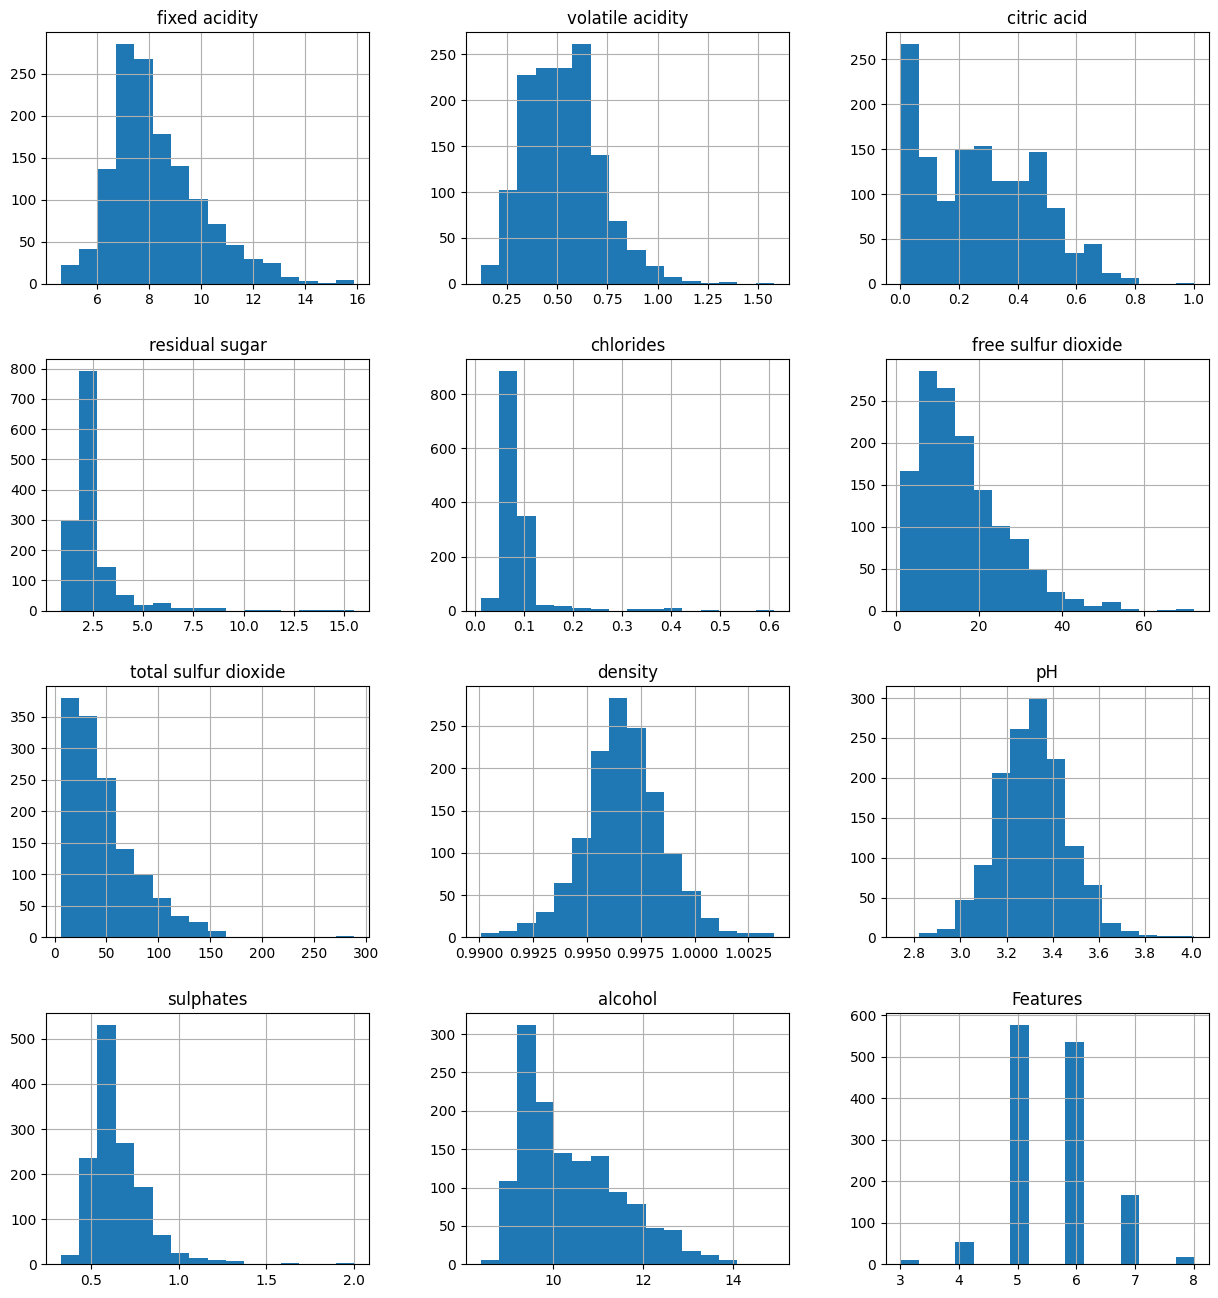

In [11]:
df.hist(figsize=(15,16), bins=16)
plt.title("Features")
plt.show()

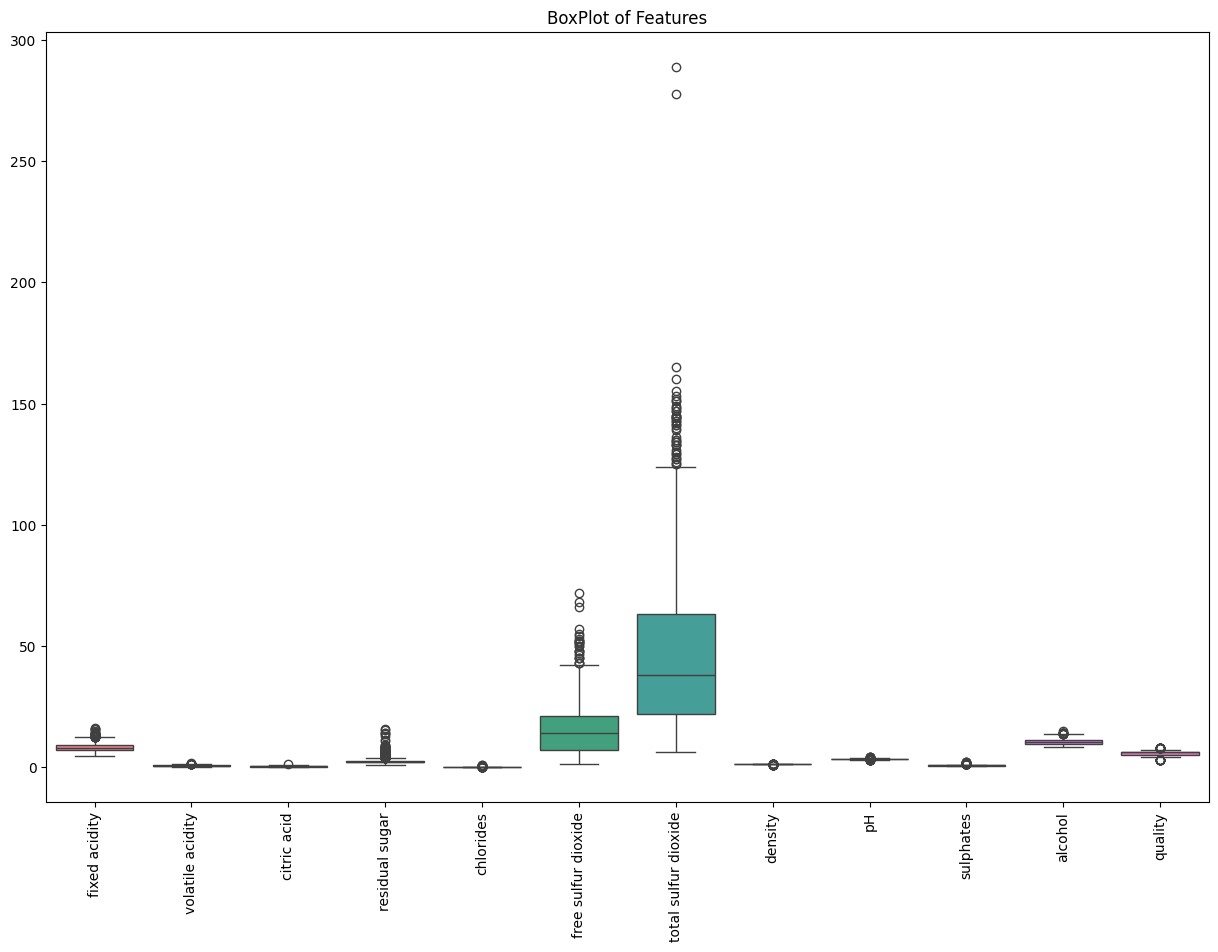

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.title("BoxPlot of Features")
plt.xticks(rotation=90)
plt.show()

In [13]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound).any(axis=1))

print(df[outliers])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               NaN               NaN          NaN             NaN        NaN   
2               NaN               NaN          NaN             NaN        NaN   
3               NaN               NaN          NaN             NaN        NaN   
5               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
1593            NaN               NaN          NaN             NaN        NaN   
1594            NaN               NaN          NaN             NaN        NaN   
1595            NaN               NaN          NaN             NaN        NaN   
1597            NaN               NaN          NaN             NaN        NaN   
1598            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  

In [14]:
cleaned_data = df[~outliers]

In [15]:
print(f"with outliers Data: {df.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

with outliers Data: (1359, 12)
Cleaned data shape: (1359, 12)


In [16]:
correlation_matrix = df.corr()
print(correlation_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df['quality'], test_size=0.2, random_state=42)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [186]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [187]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_sk = lr.predict(X_test)

In [262]:
print(lr.intercept_, lr.coef_)

5.636614535418583 [-0.04967492 -0.17849353 -0.01914776 -0.00523132 -0.11597094  0.04872282
 -0.1236      0.04206366 -0.1215483   0.14849874  0.33397019]


In [188]:
from sklearn.metrics import r2_score
r2_score_sk = r2_score(y_test, y_pred_sk)
r2_score_sk

0.3915360499058189

In [278]:
import random

class MiniBatch_Gradient_Descent():

    def __init__(self, batch_size,learning_rate, epochs):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        
        n_samples, n_features = X_train.shape
        self.coef_ = np.ones(n_features)
        self.intercept_ = 0

        for i in range(self.epochs):

            # Shuffle the data
            indicies = np.arange(n_samples)
            np.random.shuffle(indicies)
            X_train, y_train = X_train[indicies], y_train[indicies]

            for j in range(n_samples // self.batch_size):

                idx = random.sample(range(n_samples), self.batch_size)

                X_batch = X_train[idx]
                y_batch = y_train[idx]
                # print(f"Batch Indicies: {idx}")
                y_hat = self.intercept_ + np.dot(X_batch, self.coef_)

                # print(f"Epoch: {i+1}, Batch: {j+1}, y_hat: {y_hat}")
                intercept_slope = -2 * np.mean(y_batch - y_hat)
                max_grad = 1
                intercept_slope = np.clip(intercept_slope, -max_grad, max_grad)
                self.intercept_ = self.intercept_ + (self.lr * intercept_slope)

                coef_slope  = -2 * np.dot((y_batch - y_hat), X_batch)
                coef_slope = np.clip(coef_slope, -max_grad, max_grad)
                self.coef_ = self.coef_ + (self.lr * coef_slope)
                # print(f"Intercept Slope: {intercept_slope}\tIntercept Value: {self.intercept_}")
                # print(f"Coef Slope: {coef_slope}\tCoef Value: {self.coef_}")
        
        print(f"Intercept_value: {self.intercept_}\nCoef Value: {self.coef_}")
    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred                


In [279]:
int(X_train.shape[0]/10)

108

In [280]:
mgd = MiniBatch_Gradient_Descent(batch_size=64, learning_rate=0.0001, epochs=100)

In [281]:
mgd.fit(X_train, y_train=y_train)

Intercept_value: -0.1599999999999987
Coef Value: [1.1562     1.05323396 1.15680404 1.16       1.16       1.1576
 1.15930568 1.1596     0.8736741  1.1582     0.94640896]


In [267]:
y_pred = mgd.predict(X_test)

In [268]:
random.sample(range(X_train.shape[0]), 10), X_train[[675, 124, 1005, 432, 309, 362, 1009, 134, 285, 109]].shape

([532, 729, 831, 122, 449, 826, 456, 991, 803, 311], (10, 11))

In [269]:
y_test.shape, X_test.shape

((272,), (272, 11))

In [270]:
def r2_score_custom(y_true, y_pred):
    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score = 1 - (SSE / TSS)
    return r2_score

In [271]:
r2_score_c = r2_score_custom(y_test, y_pred)
print(f"R2 Score Custom: {r2_score_c}")

R2 Score Custom: -121.42406898367007
